In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
predictor = pd.read_csv('traindata-poverty-can-use-country-internet.csv', index_col=0)

In [3]:
predictor.fillna("0", inplace = True)

In [4]:
predictor1 = predictor.drop(['poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)

# country separation

In [5]:
predictorA = predictor[predictor.country == 'A']
predictorC = predictor[predictor.country == 'C']
predictorD = predictor[predictor.country == 'D']
predictorF = predictor[predictor.country == 'F']
predictorG = predictor[predictor.country == 'G']
predictorI = predictor[predictor.country == 'I']
predictorJ = predictor[predictor.country == 'J']

# Internet

In [6]:
predictorAIF = predictorA[predictorA.advanced_phone_use == 0]
predictorCIF = predictorC[predictorC.advanced_phone_use == 0]
predictorDIF = predictorD[predictorD.advanced_phone_use == 0]
predictorFIF = predictorF[predictorF.advanced_phone_use == 0]
predictorGIF = predictorG[predictorG.advanced_phone_use == 0]
predictorIIF = predictorI[predictorI.advanced_phone_use == 0]
predictorJIF = predictorJ[predictorJ.advanced_phone_use == 0]

In [7]:
predictorAIT = predictorA[predictorA.advanced_phone_use == 1]
predictorCIT = predictorC[predictorC.advanced_phone_use == 1]
predictorDIT = predictorD[predictorD.advanced_phone_use == 1]
predictorFIT = predictorF[predictorF.advanced_phone_use == 1]
predictorGIT = predictorG[predictorG.advanced_phone_use == 1]
predictorIIT = predictorI[predictorI.advanced_phone_use == 1]
predictorJIT = predictorJ[predictorJ.advanced_phone_use == 1]

In [8]:
predictorAIF1 = predictorAIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorCIF1 = predictorCIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorDIF1 = predictorDIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorFIF1 = predictorFIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorGIF1 = predictorGIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorIIF1 = predictorIIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorJIF1 = predictorJIF.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)

In [9]:
predictorAIT1 = predictorAIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorCIT1 = predictorCIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorDIT1 = predictorDIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorFIT1 = predictorFIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorGIT1 = predictorGIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorIIT1 = predictorIIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)
predictorJIT1 = predictorJIT.drop(['country', 'poverty_probability', 'prob', 'reg','poverty_prob'], axis=1)

In [10]:
XAIF1 = predictorAIF1.values
YAIF1 = predictorAIF['reg'].values

XCIF1 = predictorCIF1.values
YCIF1 = predictorCIF['reg'].values

XDIF1 = predictorDIF1.values
YDIF1 = predictorDIF['reg'].values

XFIF1 = predictorFIF1.values
YFIF1 = predictorFIF['reg'].values

XGIF1 = predictorGIF1.values
YGIF1 = predictorGIF['reg'].values

XIIF1 = predictorIIF1.values
YIIF1 = predictorIIF['reg'].values

XJIF1 = predictorJIF1.values
YJIF1 = predictorJIF['reg'].values

XAIT1 = predictorAIT1.values
YAIT1 = predictorAIT['reg'].values

XCIT1 = predictorCIT1.values
YCIT1 = predictorCIT['reg'].values

XDIT1 = predictorDIT1.values
YDIT1 = predictorDIT['reg'].values

XFIT1 = predictorFIT1.values
YFIT1 = predictorFIT['reg'].values

XGIT1 = predictorGIT1.values
YGIT1 = predictorGIT['reg'].values

XIIT1 = predictorIIT1.values
YIIT1 = predictorIIT['reg'].values

XJIT1 = predictorJIT1.values
YJIT1 = predictorJIT['reg'].values

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(XAIF1, YAIF1, test_size=0.25, random_state=32)

In [12]:
reg = Lasso()
reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
y_pred = reg.predict(X_test)

In [14]:
Y_predicted_train = reg.predict(X_train)

In [15]:
Y_predicted = reg.predict(X_test)

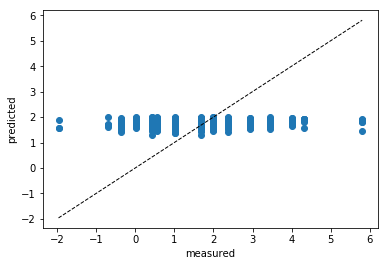

In [16]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_predicted)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [17]:
from sklearn import metrics
print('Mean Absolute Error of training data:', metrics.mean_absolute_error(Y_train, Y_predicted_train))  
print('Mean Squared Error of training data:', metrics.mean_squared_error(Y_train, Y_predicted_train))  
print('Root Mean Squared Error of training data:', np.sqrt(metrics.mean_squared_error(Y_train, Y_predicted_train)))

Mean Absolute Error of training data: 1.2058255006596217
Mean Squared Error of training data: 2.230087753012687
Root Mean Squared Error of training data: 1.49334783389962


In [18]:
from sklearn import metrics
print('Mean Absolute Error of test data:', metrics.mean_absolute_error(Y_test, Y_predicted))  
print('Mean Squared Error of test data:', metrics.mean_squared_error(Y_test, Y_predicted))  
print('Root Mean Squared Error of test data:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error of test data: 1.1294667632277566
Mean Squared Error of test data: 1.9865660755896972
Root Mean Squared Error of test data: 1.4094559502125978


In [19]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, XAIF1, YAIF1, cv=10)
print(cv_results)

[ 0.01415381 -0.02584254  0.02042067 -0.00500512  0.01312597  0.02063996
  0.02472061  0.0091443   0.04335565 -0.01894184]


In [20]:
np.mean(cv_results)

0.009577146355657474

In [21]:
regAF = Lasso(alpha=0.0001, max_iter=10e5)
regCF = Lasso(alpha=0.0001, max_iter=10e5)
regDF = Lasso(alpha=0.0001, max_iter=10e5)
regFF = Lasso(alpha=0.0001, max_iter=10e5)
regGF = Lasso(alpha=0.0001, max_iter=10e5)
regIF = Lasso(alpha=0.0001, max_iter=10e5)
regJF = Lasso(alpha=0.0001, max_iter=10e5)

In [22]:
regAF.fit(XAIF1, YAIF1)
regCF.fit(XCIF1, YCIF1)
regDF.fit(XDIF1, YDIF1)
regFF.fit(XFIF1, YFIF1)
regGF.fit(XGIF1, YGIF1)
regIF.fit(XIIF1, YIIF1)
regJF.fit(XJIF1, YJIF1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
lr = LinearRegression()

country A

In [24]:
testAF = pd.read_csv('A-valcountry.csv', index_col=0)
testCF = pd.read_csv('C-valcountry.csv', index_col=0)
testDF = pd.read_csv('D-valcountry.csv', index_col=0)
testFF = pd.read_csv('F-valcountry.csv', index_col=0)
testGF = pd.read_csv('G-valcountry.csv', index_col=0)
testIF = pd.read_csv('I-valcountry.csv', index_col=0)
testJF = pd.read_csv('J-valcountry.csv', index_col=0)

In [25]:
AFtestvalues = testAF.values
CFtestvalues = testCF.values
DFtestvalues = testDF.values
FFtestvalues = testFF.values
GFtestvalues = testGF.values
IFtestvalues = testIF.values
JFtestvalues = testJF.values

In [26]:
povertyAF = regAF.predict(AFtestvalues)
povertyAF = povertyAF.tolist()

povertyCF = regCF.predict(CFtestvalues)
povertyCF = povertyCF.tolist()

povertyDF = regDF.predict(DFtestvalues)
povertyDF = povertyDF.tolist()

povertyFF = regFF.predict(FFtestvalues)
povertyFF = povertyFF.tolist()

povertyGF = regGF.predict(GFtestvalues)
povertyGF = povertyGF.tolist()

povertyIF = regIF.predict(IFtestvalues)
povertyIF = povertyIF.tolist()

povertyJF = regJF.predict(JFtestvalues)
povertyJF = povertyJF.tolist()

In [27]:
lr = LinearRegression()

In [28]:
rowidAF = testAF.index.tolist()
rowidCF = testCF.index.tolist()
rowidDF = testDF.index.tolist()
rowidFF = testFF.index.tolist()
rowidGF = testGF.index.tolist()
rowidIF = testIF.index.tolist()
rowidJF = testJF.index.tolist()

In [29]:
AF = pd.DataFrame(povertyAF,rowidAF)
CF = pd.DataFrame(povertyCF,rowidCF)
DF = pd.DataFrame(povertyDF,rowidDF)
FF = pd.DataFrame(povertyFF,rowidFF)
GF = pd.DataFrame(povertyGF,rowidGF)
IF = pd.DataFrame(povertyIF,rowidIF)
JF = pd.DataFrame(povertyJF,rowidJF)

In [30]:
AF.index.name = 'row_id'
CF.index.name = 'row_id'
DF.index.name = 'row_id'
FF.index.name = 'row_id'
GF.index.name = 'row_id'
IF.index.name = 'row_id'
JF.index.name = 'row_id'

In [31]:
AF.columns = ['reg']
CF.columns = ['reg']
DF.columns = ['reg']
FF.columns = ['reg']
GF.columns = ['reg']
IF.columns = ['reg']
JF.columns = ['reg']

In [32]:
df = pd.concat([AF, CF, DF, FF, GF, IF, JF])

In [33]:
df = df.astype('float64')

In [34]:
df.to_csv('poverty-model-country-A-J.csv')